# Python for Machine Learning

### *Session \#2*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Review

### Warm Ups

*Type the given code into the cell below*

---

In [22]:
import pandas as pd
df = pd.read_excel('titanic.xlsx')

**Create feature matrix:**
```python
columns = ['fare', 'pclass']
X = df[columns]
```                    

In [23]:
columns = ['fare', 'pclass']
X = df[columns]

**Create target vector:** `y = df['alive']`

In [24]:
y = df['alive']

**Create train/test split:**
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Create model:**
```python
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
```                    



In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

### Exercises
---
**1. Train the model using only** `fare, sibsp, pclass` **in the feature matrix, with** `survived` **as the target vector**

In [28]:
columns = ['fare', 'sibsp', 'pclass']
X = df[columns]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y)
model = KNeighborsClassifier(18)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

**2. Plot a confusion matrix for the model. What is the accuracy? Sensitivity?**

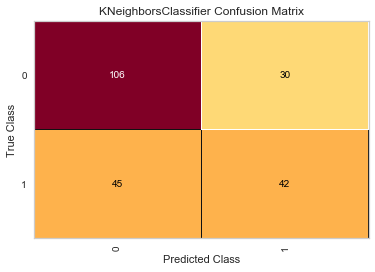

In [35]:
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
from yellowbrick.model_selection import ValidationCurve
%matplotlib inline

matrix = ConfusionMatrix(KNeighborsClassifier(18))
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.finalize()

**3. Use a validation curve to set a reasonable value for** `n_neighbors`

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


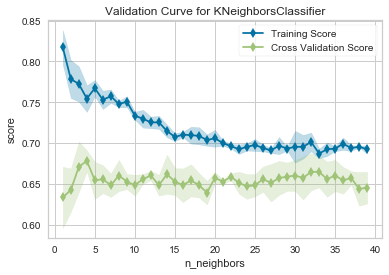

In [39]:
viz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=range(1, 40)
)
viz.fit(X_train, y_train)
viz.finalize()

## II. Handling Missing Data

### Warm Ups

*Type the given code into the cell below*

---

**Find rows with null age:**
```python
null_fare = df['fare'].isnull()
df[null_fare]
```


**Drop rows with nulls:**`df.dropna(subset=['fare'])`                    
*Hint: You can also set* `inplace=True` *to change the original dataframe*


**Find count of nulls:**`df.isnull().sum()`                    



**Find percentage of nulls:**`df.isnull().mean()`                    



**Fill in nulls based on filter:**
```python
df.loc[null_fare, 'fare'] = df['fare'].mean()
```

### Exercises
---

**1. Find the percentage of nulls across all columns. Drop nulls from columns that have <5% nulls.**

In [52]:
df.isnull().mean()

df.dropna(subset=['embarked', 'embark_town'], inplace=True)

survived       0.0000
pclass         0.0000
sex            0.0000
age            0.1991
sibsp          0.0000
parch          0.0000
fare           0.0000
embarked       0.0000
class          0.0000
who            0.0000
adult_male     0.0000
embark_town    0.0000
alive          0.0000
alone          0.0000
dtype: float64

**2. Drop columns with more than 50% nulls.**

In [53]:
df.drop('deck', 1, inplace=True)

**3. Fill in the age nulls by taking the average age across the** `who` **column**

**So, men with nulls would get the average age of people with** `man` **in the** `who` **column, children with nulls would get the average age of people with** `child` **in the** `who` **column**

In [56]:
null_age = df['age'].isnull()

man = df['who'] == 'man'
woman = df['who'] == 'woman'
child = df['who'] == 'child'

df.loc[null_age & man, 'age'] = df.loc[man, 'age'].mean()
df.loc[null_age & woman, 'age'] = df.loc[woman, 'age'].mean()
df.loc[null_age & child, 'age'] = df.loc[child, 'age'].mean()

## III. Scaling and One-Hot Encoding

### Warm Ups

*Type the given code into the cell below*

---

**Imports for One-Hot Encoding and Pipelines:**

In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

**Add encoding to model using pipeline:**
```python
model = make_pipeline(OneHotEncoder(), KNeighborsClassifier(3))
```

**Add StandardScaler to model using pipeline:**
```python
model = make_pipeline(StandardScaler(), KNeighborsClassifier(3))
```

**Split pipeline between two types of columns:**
```python
numeric = ['fare', 'age']
categorical = ['pclass', 'embark_town', 'who']

column_transformer = make_column_transformer(
        (StandardScaler(), numeric),
        (OneHotEncoder(), categorical)
    )

model = make_pipeline(column_transformer, KNeighborsClassifier(3))
```

### Exercises
---

**1. Create a** `OneHotEncoder(sparse=False)` **object as** `encoder` **and call** `encoder.fit_transform()` **on the categorical columns of X**

Note: The `sparse=False` parameter makes the output a normal Numpy array

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(df[categorical])

**2. Create a model based on only the categorical features of X. Fit the model to the data, and find the model's accuracy.**

Hint: Use a pipeline and OneHotEncoder()

In [57]:
categorical = ['pclass', 'embark_town', 'who']

X = df[categorical]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = make_pipeline(OneHotEncoder(), KNeighborsClassifier(3))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6188340807174888

**3. Create a model based on only the numeric features of X, which preprocesses data using StandardScaler(). Fit the model to the data, and find the accuracy.**

In [59]:
numeric = ['fare', 'age']

X = df[numeric]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = make_pipeline(StandardScaler(), KNeighborsClassifier(3))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6816143497757847

**4. Use a ColumnTransformer to create a model with both** `OneHotEncoder()` **and** `StandardScaler()` **preprocessing for the appropriate columns. What's the accuracy for this combined model?**

In [60]:
X = df.drop('survived', 1)
y = df['survived']

numeric = ['fare', 'age']
categorical = ['pclass', 'embark_town', 'who']

X_train, X_test, y_train, y_test = train_test_split(X, y)

column_transformer = make_column_transformer(
        (StandardScaler(), numeric),
        (OneHotEncoder(), categorical)
    )

model = make_pipeline(column_transformer, KNeighborsClassifier(3))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6995515695067265